In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
u_inf = 15

In [3]:
route = './cases/output/glider_uinf%04.d/output/stability' % u_inf

In [30]:
def load_evals(u_inf):
    route = './cases/glider_u_inf%04.d/output/glider_u_inf%04.d/stability' % (u_inf, u_inf)
    evals_data = pd.read_csv(route + '/eigenvalues.csv')
    evals = evals_data['0'] + 1j*evals_data['1']
    return evals

(0.3, 0.5)

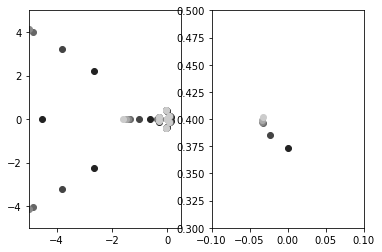

In [63]:
u_inf = [15, 22, 28, 29, 30, 32]
c = np.linspace(0, 0.8, len(u_inf)+1)
fig, ax = plt.subplots(ncols=2)
iter=0
for v in u_inf:
    iter +=1
    evals = load_evals(v)
    ax[0].scatter(evals.real, evals.imag, c=str(c[iter]))
    ax[1].scatter(evals.real, evals.imag, c=str(c[iter]))


ax[0].set_xlim(-5, 0.5)
ax[0].set_ylim(-5, 5)
ax[1].set_xlim(-0.1, 0.1)
ax[1].set_ylim(.3, 0.5)

In [99]:
plt.rcParams.update(plt.rcParamsDefault)

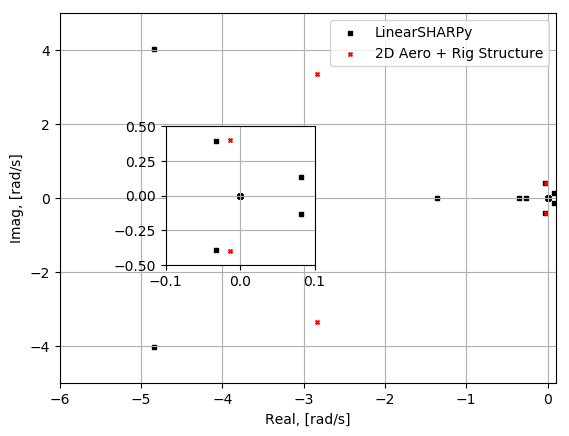

In [107]:
evals28 = load_evals(28)
evals_amf = np.array([-2.84 + 3.36j, -2.84-3.36j, -0.0135 + 0.4j, -0.0135 - 0.4j])
fig, ax = plt.subplots()

ax.scatter(evals28.real, evals28.imag, c='k', marker='s', s=5, label='LinearSHARPy')
ax.scatter(evals_amf.real, evals_amf.imag, c='r', marker='x', s=8, label='2D Aero + Rig Structure')
ax.set_xlim(-6, 0.1)
ax.set_ylim(-5, 5)
# plt.style.use('report')

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(ax, width="50%", height="75%",
                   bbox_to_anchor=(.2, .3, .6, .5),
                   bbox_transform=ax.transAxes, loc=3)
axins.scatter(evals28.real, evals28.imag, c='k', marker='s', s=5, label='LinearSHARPy')
axins.scatter(evals_amf.real, evals_amf.imag, c='r', marker='x', s=8, label='2D Aero + Rig Structure')
axins.set_xlim(-0.1,0.1)
axins.set_ylim(-0.5, 0.5)
axins.grid()
ax.grid()
ax.legend()
ax.set_xlabel('Real, [rad/s]')
ax.set_ylabel('Imag, [rad/s]');
fig.savefig('./figures/glider_eigenvalues_28.eps',
            bbox_inches='tight', 
            transparent=False,
            pad_inches=0.02)